In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [1]:
import pandas as pd

# Load metadata from CSV into a pandas DataFrame
metadata_df = pd.read_csv('metadata.csv')

# Now you can use metadata_df for your machine learning tasks
print(metadata_df.head())  # Example: Display the first few rows of the metadata


                                               title  \
0  MSCCR_reGRID_10_Biopsy_18, CD participants,Rig...   
1  MSCCR_reGRID_102_Biopsy_206, CD participants,R...   
2  MSCCR_reGRID_1082_Biopsy_1836, CD participants...   
3  MSCCR_reGRID_109_Biopsy_218, CD participants,R...   
4  MSCCR_reGRID_110_Biopsy_221, CD participants,R...   

                       sample_id      individual_id      tissue case_control  \
0      MSCCR_reGRID_10_Biopsy_18    MSCCR_reGRID_10  RightColon      CD_NonI   
1    MSCCR_reGRID_102_Biopsy_206   MSCCR_reGRID_102  RightColon      CD_NonI   
2  MSCCR_reGRID_1082_Biopsy_1836  MSCCR_reGRID_1082  RightColon      CD_NonI   
3    MSCCR_reGRID_109_Biopsy_218   MSCCR_reGRID_109  RightColon      CD_NonI   
4    MSCCR_reGRID_110_Biopsy_221   MSCCR_reGRID_110  RightColon      CD_NonI   

      sex  eligibility_age_at_endo clinician_measure_active disease  severity  \
0  Female                       60                   Active      CD  Inactive   
1    Male           

In [2]:
print(metadata_df.describe())

       eligibility_age_at_endo
count               248.000000
mean                 46.266129
std                  15.293940
min                  20.000000
25%                  33.000000
50%                  47.000000
75%                  58.000000
max                  82.000000


In [4]:
print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     248 non-null    object
 1   sample_id                 248 non-null    object
 2   individual_id             248 non-null    object
 3   tissue                    248 non-null    object
 4   case_control              248 non-null    object
 5   sex                       248 non-null    object
 6   eligibility_age_at_endo   248 non-null    int64 
 7   clinician_measure_active  207 non-null    object
 8   disease                   248 non-null    object
 9   severity                  229 non-null    object
 10  geo_accession             248 non-null    object
 11  extract_protocol          248 non-null    object
 12  data_processing           248 non-null    object
 13  contact                   248 non-null    object
 14  for_dim_reduce            

In [9]:
# Identify the number of missing values in each feature
missing_values = metadata_df.isnull().sum()
print(missing_values)

title                        0
sample_id                    0
individual_id                0
tissue                       0
case_control                 0
sex                          0
eligibility_age_at_endo      0
clinician_measure_active    41
disease                      0
severity                    19
geo_accession                0
extract_protocol             0
data_processing              0
contact                      0
for_dim_reduce               0
dtype: int64


In [11]:
metadata_df.loc[metadata_df.isnull().sum(axis=1)>=3, :]


,title,sample_id,individual_id,tissue,case_control,sex,eligibility_age_at_endo,clinician_measure_active,disease,severity,geo_accession,extract_protocol,data_processing,contact,for_dim_reduce


In [18]:
X = metadata_df.drop(['severity','title','sample_id','individual_id','extract_protocol','data_processing','geo_accession','contact','for_dim_reduce'], axis=1)
y = metadata_df['severity']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15)

In [19]:
X_train

,tissue,case_control,sex,eligibility_age_at_endo,clinician_measure_active,disease
55,RightColon,UC_NonI,Female,51,Inactive,UC
6,RightColon,CD_NonI,Female,42,Inactive,CD
139,RightColon,CD_I,Male,28,Inactive,CD
172,RightColon,CD_NonI,Female,26,Inactive,CD
40,RightColon,CD_NonI,Female,32,NaN,CD
...,...,...,...,...,...,...
119,RightColon,UC_NonI,Female,66,Inactive,UC
133,RightColon,CD_I,Male,38,Inactive,CD
140,RightColon,CD_I,Female,44,Inactive,CD
245,RightColon,UC_NonI,Female,68,Inactive,UC


### Dealing with missing values


In [20]:
# Dealing with missing data in metadata_df:

# Identify numeric and non-numeric columns
numeric_columns_df = metadata_df.select_dtypes(include='number').columns
non_numeric_columns_df = metadata_df.columns.difference(numeric_columns_df)

# Convert numeric columns to numeric type
metadata_df[numeric_columns_df] = metadata_df[numeric_columns_df].apply(pd.to_numeric, errors='coerce')

# Handle non-numeric columns (drop them for simplicity)
metadata_df = metadata_df.drop(columns=non_numeric_columns_df)

# Fill missing values for numeric columns
metadata_df.loc[:, numeric_columns_df] = metadata_df[numeric_columns_df].fillna(metadata_df[numeric_columns_df].mean())

,eligibility_age_at_endo,case_control,clinician_measure_active,disease,sex,tissue
0,69.0,CD_NonI,Inactive,CD,Male,RightColon
1,52.0,UC_NonI,Inactive,UC,Male,RightColon
2,23.0,CD_NonI,Inactive,CD,Female,RightColon
3,55.0,CD_NonI,Inactive,CD,Female,RightColon
4,41.0,UC_NonI,Inactive,UC,Female,RightColon
...,...,...,...,...,...,...
57,56.0,UC_NonI,Inactive,UC,Female,RightColon
58,44.0,UC_NonI,Inactive,UC,Female,RightColon
59,27.0,CD_NonI,Inactive,CD,Female,RightColon
60,33.0,CD_NonI,Inactive,CD,Male,RightColon


In [35]:
# Dealing with missing data in the X_train and X_test:

# Imputation
numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.columns.difference(numeric_columns)

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_train_numeric = pd.DataFrame(imputer_numeric.fit_transform(X_train[numeric_columns]), columns=numeric_columns)
X_train_categorical = pd.DataFrame(imputer_categorical.fit_transform(X_train[categorical_columns]), columns=categorical_columns)

X_test_numeric = pd.DataFrame(imputer_numeric.transform(X_test[numeric_columns]), columns=numeric_columns)
X_test_categorical = pd.DataFrame(imputer_categorical.transform(X_test[categorical_columns]), columns=categorical_columns)

# Concatenating imputed data
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical], axis=1)



In [66]:
encoder = OneHotEncoder(sparse_output= False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_imputed[categorical_columns]), columns=encoder.get_feature_names_out())


In [67]:
X_train_encoded

,case_control_CD_I,case_control_CD_NonI,case_control_Control_NonI,case_control_UC_I,case_control_UC_NonI,clinician_measure_active_Active,clinician_measure_active_Inactive,disease_CD,disease_Control,disease_UC,sex_Female,sex_Male,tissue_RightColon
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
182,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
183,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
184,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


/var/folders/2h/bbbvjdx116z_mj6r0q4x6njw0000gn/T/ipykernel_70786/4032375675.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
/var/folders/2h/bbbvjdx116z_mj6r0q4x6njw0000gn/T/ipykernel_70786/4032375675.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')


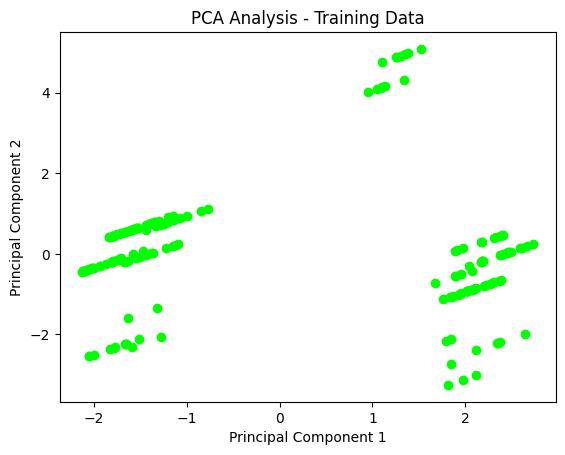

/var/folders/2h/bbbvjdx116z_mj6r0q4x6njw0000gn/T/ipykernel_70786/4032375675.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma')
/var/folders/2h/bbbvjdx116z_mj6r0q4x6njw0000gn/T/ipykernel_70786/4032375675.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma')


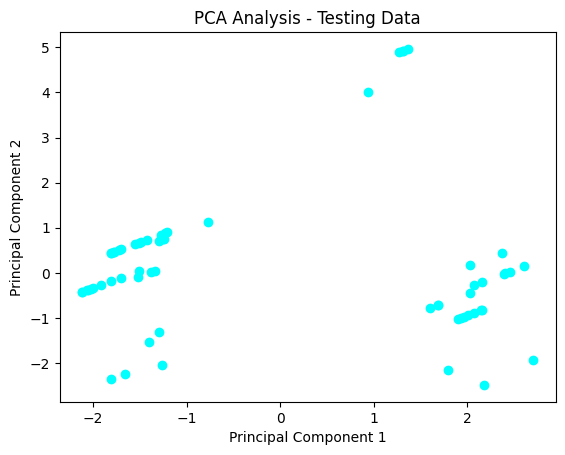

In [68]:
# One-Hot Encoding for categorical variables
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_imputed[categorical_columns]), columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(encoder.transform(X_test_imputed[categorical_columns]), columns=encoder.get_feature_names_out())

X_train_prepared = pd.concat([X_train_imputed.drop(categorical_columns, axis=1), X_train_encoded], axis=1)
X_test_prepared = pd.concat([X_test_imputed.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

# Standardise data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prepared)
X_test_scaled = scaler.transform(X_test_prepared)


# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualising PCA results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Analysis - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma')
plt.title('PCA Analysis - Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [51]:
def impute_data(X_train, X_test):
    numeric_columns = X_train.select_dtypes(include=['number']).columns
    categorical_columns = X_train.columns.difference(numeric_columns)

    # Handle missing values in numeric columns
    imputer_numeric = SimpleImputer(strategy='mean')
    X_train_numeric = pd.DataFrame(imputer_numeric.fit_transform(X_train[numeric_columns]), columns=numeric_columns)
    X_test_numeric = pd.DataFrame(imputer_numeric.transform(X_test[numeric_columns]), columns=numeric_columns)

    # Handle missing values in categorical columns
    X_train[categorical_columns] = X_train[categorical_columns].fillna('missing')  # Replace None with 'missing'
    X_test[categorical_columns] = X_test[categorical_columns].fillna('missing')

    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_train_categorical = pd.DataFrame(imputer_categorical.fit_transform(X_train[categorical_columns]), columns=categorical_columns)
    X_test_categorical = pd.DataFrame(imputer_categorical.transform(X_test[categorical_columns]), columns=categorical_columns)

    return X_train_numeric, X_train_categorical, X_test_numeric, X_test_categorical


def encode_categorical(X_train_categorical, X_test_categorical):
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # Fit encoder on training data and transform both training and testing data
    X_train_encoded = encoder.fit_transform(X_train_categorical)
    X_test_encoded = encoder.transform(X_test_categorical)
    
    # Create DataFrames with appropriate column names
    columns = encoder.get_feature_names_out(X_train_categorical.columns)
    X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=columns)
    X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=columns)
    
    return X_train_encoded_df, X_test_encoded_df

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train_scaled, X_test_scaled

def apply_pca(X_train_scaled, X_test_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    return X_train_pca, X_test_pca

def visualize_pca(X_train_pca, X_test_pca, y_train, y_test):
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
    plt.title('PCA Analysis - Training Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma')
    plt.title('PCA Analysis - Testing Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()


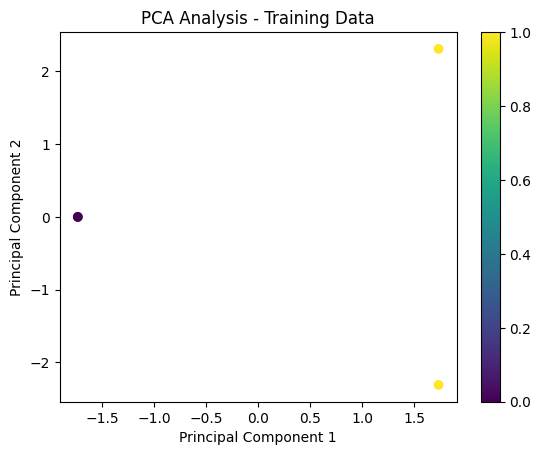

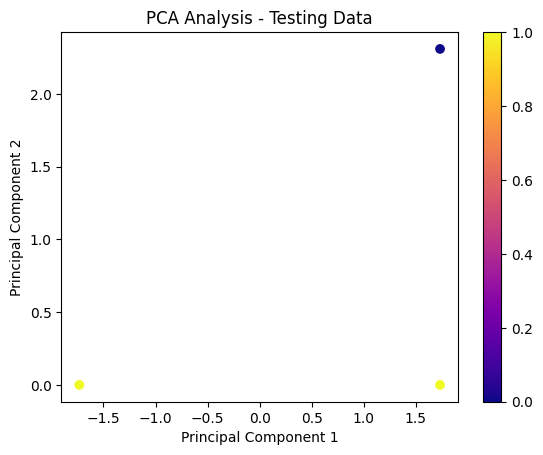

In [52]:
# Example data (replace with your actual data)
X_train = pd.DataFrame({
    'numeric_feature1': [1, 2, None, 4],
    'numeric_feature2': [3, 4, 5, 6],
    'categorical_feature1': ['A', 'B', 'A', 'C'],
    'categorical_feature2': ['X', 'Y', None, 'Z']
})

X_test = pd.DataFrame({
    'numeric_feature1': [5, 6, None],
    'numeric_feature2': [7, 8, 9],
    'categorical_feature1': ['B', 'A', 'B'],
    'categorical_feature2': ['Y', None, 'Z']
})

y_train = [0, 1, 0, 1]
y_test = [0, 1, 1]

# Step 1: Imputation
X_train_numeric, X_train_categorical, X_test_numeric, X_test_categorical = impute_data(X_train, X_test)
# Example of how to apply the revised function

# Assuming X_train_categorical and X_test_categorical are preprocessed categorical dataframes
X_train_encoded, X_test_encoded = encode_categorical(X_train_categorical, X_test_categorical)

# Proceed to scale data, apply PCA, or other steps as needed
X_train_scaled, X_test_scaled = scale_data(X_train_encoded, X_test_encoded)



# Step 4: Applying PCA
X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled)

# Step 5: Visualizing PCA results
visualize_pca(X_train_pca, X_test_pca, y_train, y_test)


In [46]:
X_train_pca

array([[ 0.73407078,  0.84783774],
       [-0.71159852, -0.6075056 ],
       [-1.22135703,  0.18300419],
       [-1.62984359, -0.11167333],
       [-1.28550169, -0.29761043],
       [-0.79697957, -0.15088776],
       [-1.51506296, -0.17365236],
       [-0.02291471, -0.97937981],
       [ 1.74445126,  0.40699175],
       [ 0.73407078,  0.84783774],
       [ 0.76648264,  0.949194  ],
       [ 1.09893901, -0.48206301],
       [ 0.27261502,  1.11113433],
       [ 0.38972888,  1.03377485],
       [-1.36553724, -0.14965559],
       [ 0.64312386, -1.2342887 ],
       [ 1.69039421,  0.05590516],
       [ 0.46560741, -0.83265714],
       [ 1.32850028, -0.60602108],
       [ 0.61929015,  0.90981678],
       [ 0.18400132, -0.98637256],
       [ 0.90390851,  0.77024964],
       [ 2.37574475,  0.06610706],
       [ 2.24674536, -1.10185335],
       [ 0.82953945,  0.52074792],
       [ 1.2279384 ,  0.68589741],
       [ 0.76881586,  0.93381355],
       [ 1.93926745,  0.19705788],
       [-0.83711298,

In [53]:
X_train_encoded

,categorical_feature1_A,categorical_feature1_B,categorical_feature1_C,categorical_feature2_X,categorical_feature2_Y,categorical_feature2_Z,categorical_feature2_missing
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
X_train_scaled

,categorical_feature1_A,categorical_feature1_B,categorical_feature1_C,categorical_feature2_X,categorical_feature2_Y,categorical_feature2_Z,categorical_feature2_missing
0,1.0,-0.577350,-0.577350,1.732051,-0.577350,-0.577350,-0.577350
1,-1.0,1.732051,-0.577350,-0.577350,1.732051,-0.577350,-0.577350
2,1.0,-0.577350,-0.577350,-0.577350,-0.577350,-0.577350,1.732051
3,-1.0,-0.577350,1.732051,-0.577350,-0.577350,1.732051,-0.577350
